Accuracy: 0.66
Classification Report:
               precision    recall  f1-score   support

           1       0.65      0.67      0.66     89841
           2       0.66      0.65      0.65     90031

    accuracy                           0.66    179872
   macro avg       0.66      0.66      0.66    179872
weighted avg       0.66      0.66      0.66    179872



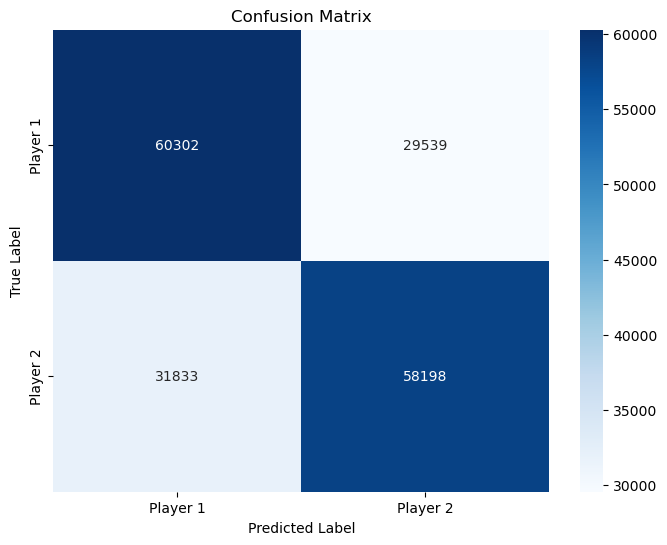

In [5]:
#Michael Sanati
#importing necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# loading preprocessed dataset
data = pd.read_csv('FinalTennisCSV.csv')

# specify target variable
X = data.drop(columns=['winner'])  # Exclude the target variable
y = data['winner']

# split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# train the model on the training data
random_forest_model.fit(X_train, y_train)

# make predictions on the testing data
y_pred = random_forest_model.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Player 1', 'Player 2'], yticklabels=['Player 1', 'Player 2'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



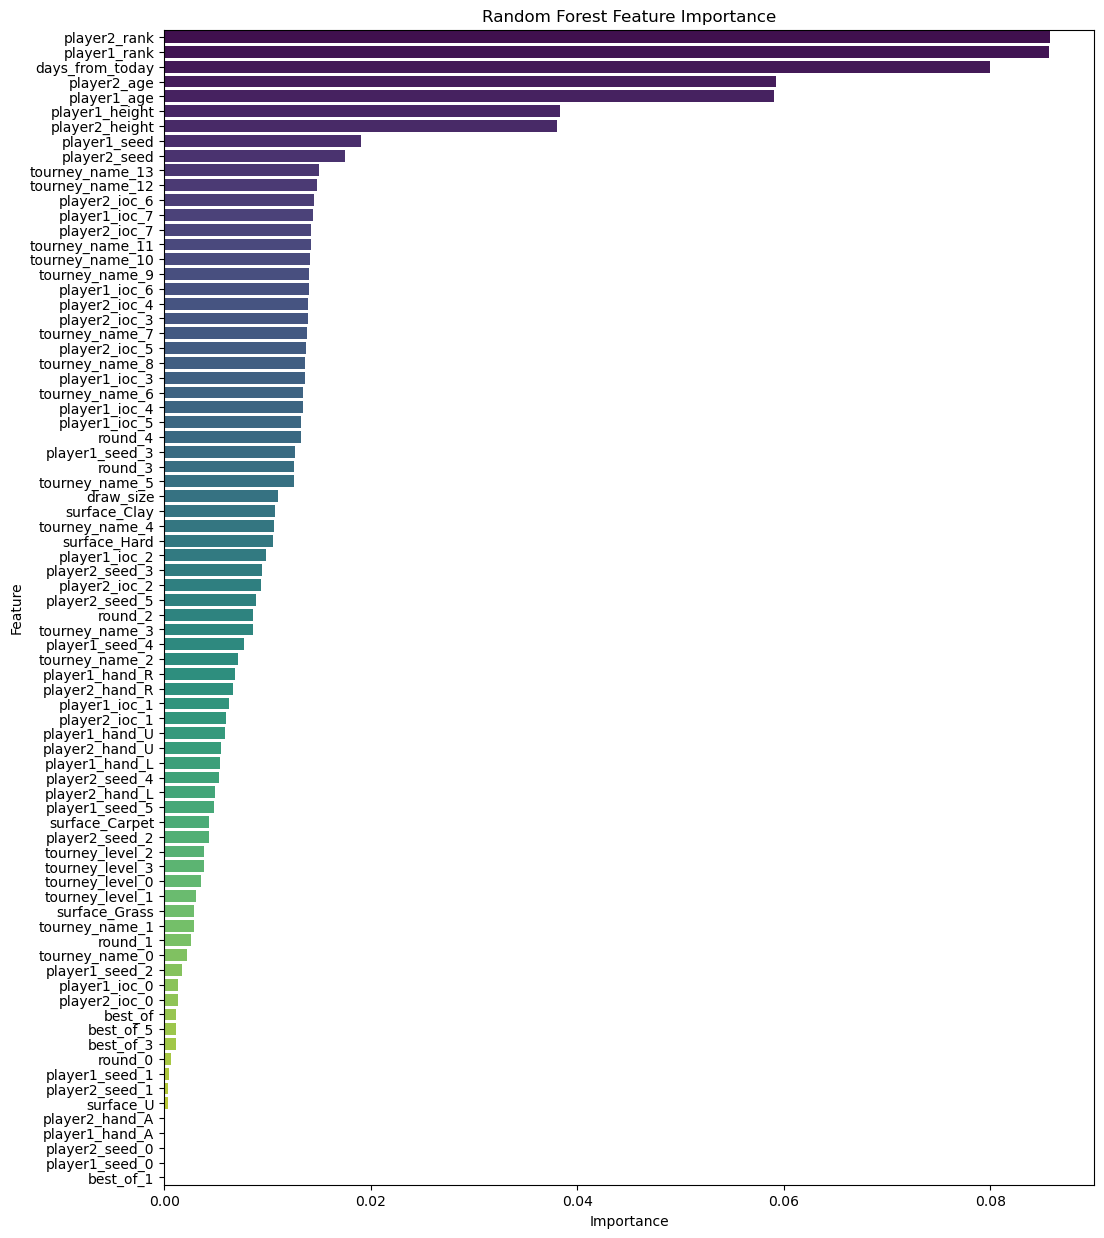

In [2]:
# get feature importances
feature_importances = random_forest_model.feature_importances_

# dataframe with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# soft dataframe by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# plotting
plt.figure(figsize=(12, 15))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.show()
